In [1]:
import xarray as xr
import cartopy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

/home/estudiantes/anaconda/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
## Importando datos resultantes de los modelos

#HadGEM
HadGEM_histo=xr.open_dataset("/home/andreagvc/data/CMIP/Results/cal_historical_HADGEM.nc")
HadGEM_ssp585=xr.open_dataset("/home/andreagvc/data/CMIP/Results/cal_ssp585_HADGEM.nc")

#GFDL
GFDL_histo=xr.open_dataset("/home/andreagvc/data/CMIP/Results/cal_historical_GFDL.nc")
GFDL_ssp585=xr.open_dataset("/home/andreagvc/data/CMIP/Results/cal_ssp585_GFDL.nc")

In [5]:
#Seleccionando las variables

#Histórico, HADGEM
Had_TW_histo=HadGEM_histo.Tw.where(HadGEM_histo.Tw.time.dt.year>1983,drop=True)
Had_T_histo=HadGEM_histo.T.where(HadGEM_histo.T.time.dt.year>1983,drop=True)
Had_q_histo=HadGEM_histo.SH.where(HadGEM_histo.SH.time.dt.year>1983,drop=True)

#Histórico, GFDL
GFDL_TW_histo=GFDL_histo.Tw.where(GFDL_histo.Tw.time.dt.year>1983,drop=True)
GFDL_T_histo=GFDL_histo.T.where(GFDL_histo.T.time.dt.year>1983,drop=True)
GFDL_q_histo=GFDL_histo.SH.where(GFDL_histo.SH.time.dt.year>1983,drop=True)

#ssp585, HADGEM
Had_TW_ssp585=HadGEM_ssp585.Tw.where(HadGEM_ssp585.Tw.time.dt.year>2069,drop=True)
Had_T_ssp585=HadGEM_ssp585.T.where(HadGEM_ssp585.T.time.dt.year>2069,drop=True)
Had_q_ssp585=HadGEM_ssp585.SH.where(HadGEM_ssp585.SH.time.dt.year>2069,drop=True)

#ssp585, GFDL
#ssp585, GFDL
GFDL_TW_ssp585=GFDL_ssp585.Tw.where(GFDL_ssp585.Tw.time.dt.year>2069,drop=True)
GFDL_T_ssp585=GFDL_ssp585.T.where(GFDL_ssp585.T.time.dt.year>2069,drop=True)
GFDL_q_ssp585=GFDL_ssp585.SH.where(GFDL_ssp585.SH.time.dt.year>2069,drop=True)


In [6]:
#Función para la serie de tiempo
def serieT(variable,unidades=0):
    ar=variable.resample(time="YE").mean("time")  
    ar=ar.mean(["time"])-unidades
    return ar

In [7]:
#Realizando la serie de tiempo para el escenario historico
#HadGEM
seHAD_TW=serieT(Had_TW_histo,unidades=273.15)
seHAD_T=serieT(Had_T_histo,unidades=273.15)
seHAD_q=serieT(Had_q_histo,unidades=0)

#GFDL
seGF_TW=serieT(GFDL_TW_histo,unidades=273.15)
seGF_T=serieT(GFDL_T_histo,unidades=273.15)
seGF_q=serieT(GFDL_q_histo,unidades=0)

In [8]:
#Realizando la serie de tiempo para el escenario ssp585

#HadGEM
seHAD_TWs=serieT(Had_TW_ssp585,unidades=273.15)
seHAD_Ts=serieT(Had_T_ssp585,unidades=273.15)
seHAD_qs=serieT(Had_q_ssp585,unidades=0)

#GFDL
seGF_TWs=serieT(GFDL_TW_ssp585,unidades=273.15)
seGF_Ts=serieT(GFDL_T_ssp585,unidades=273.15)
seGF_qs=serieT(GFDL_q_ssp585,unidades=0)

In [9]:
#Función para recortar, en los modelos, solo los datos continentales 
def mask(datos,tipo):
    if tipo==0:
        mask_Had=xr.open_dataset("/home/andreagvc/data/CMIP/Data/sftlf_fx_HadGEM3-GC31-MM_piControl_r1i1p1f1_gn.nc")
        scoor_Had=mask_Had.sftlf.sel(lon=slice(datos.lon.min(),datos.lon.max()),lat=slice(datos.lat.min(),datos.lat.max()))
        scoor_Had['lon']=datos.lon[1:]
        scoor_Had['lat']=datos.lat
        Land=datos.where(scoor_Had>2,drop=True)
        return Land
    if tipo==1:
        mask_GFDL=xr.open_dataset("/home/andreagvc/data/CMIP/Data/sftlf_fx_GFDL-CM4_historical_r1i1p1f1_gr2.nc")
        scoor_GFDL=mask_GFDL.sftlf.sel(lon=slice(datos.lon.min(),datos.lon.max()),lat=slice(datos.lat.min(),datos.lat.max()))
        #scoor_Had['lon']=datos.lon
        #scoor_Had['lat']=datos.lat
        Land=datos.where(scoor_GFDL>3,drop=True)
    
        return Land
    

In [10]:
#Realizando la serie de tiempo para el escenario historico
#HadGEM
seHADL_TW=mask(seHAD_TW,0)
seHADL_T=mask(seHAD_T,0)
seHADL_q=mask(seHAD_q,0)

#GFDL
seGFL_TW=mask(seGF_TW,1)
seGFL_T=mask(seGF_T,1)
seGFL_q=mask(seGF_q,1)

In [11]:
#Realizando la serie de tiempo para el escenario ssp585
#HadGEM
seHADL_TWs=mask(seHAD_TWs,0)
seHADL_Ts=mask(seHAD_Ts,0)
seHADL_qs=mask(seHAD_qs,0)

#GFDL
seGFL_TWs=mask(seGF_TWs,1)
seGFL_Ts=mask(seGF_Ts,1)
seGFL_qs=mask(seGF_qs,1)

In [12]:
datos=[seHADL_T,seHADL_q*1000,seHADL_TW,seGFL_T,seGFL_q*1000,seGFL_TW]
colors=["YlOrRd","PuBu","Reds","YlOrRd","PuBu","Reds"]
name=["[ $^{\circ}$C]","[$g$ $kg^{-1}$]"," [$^{\circ}$C]","[$^{\circ}$C]"," [$g$ $kg^{-1}$]"," [$^{\circ}$C]"]
inc=["a) $T_{mean}$ ","b) $SH_{mean}$ ","c) $T_{W,mean}$","d) $T_{mean}$","e) $SH_{mean}$","f) $T_{W,mean}$"]

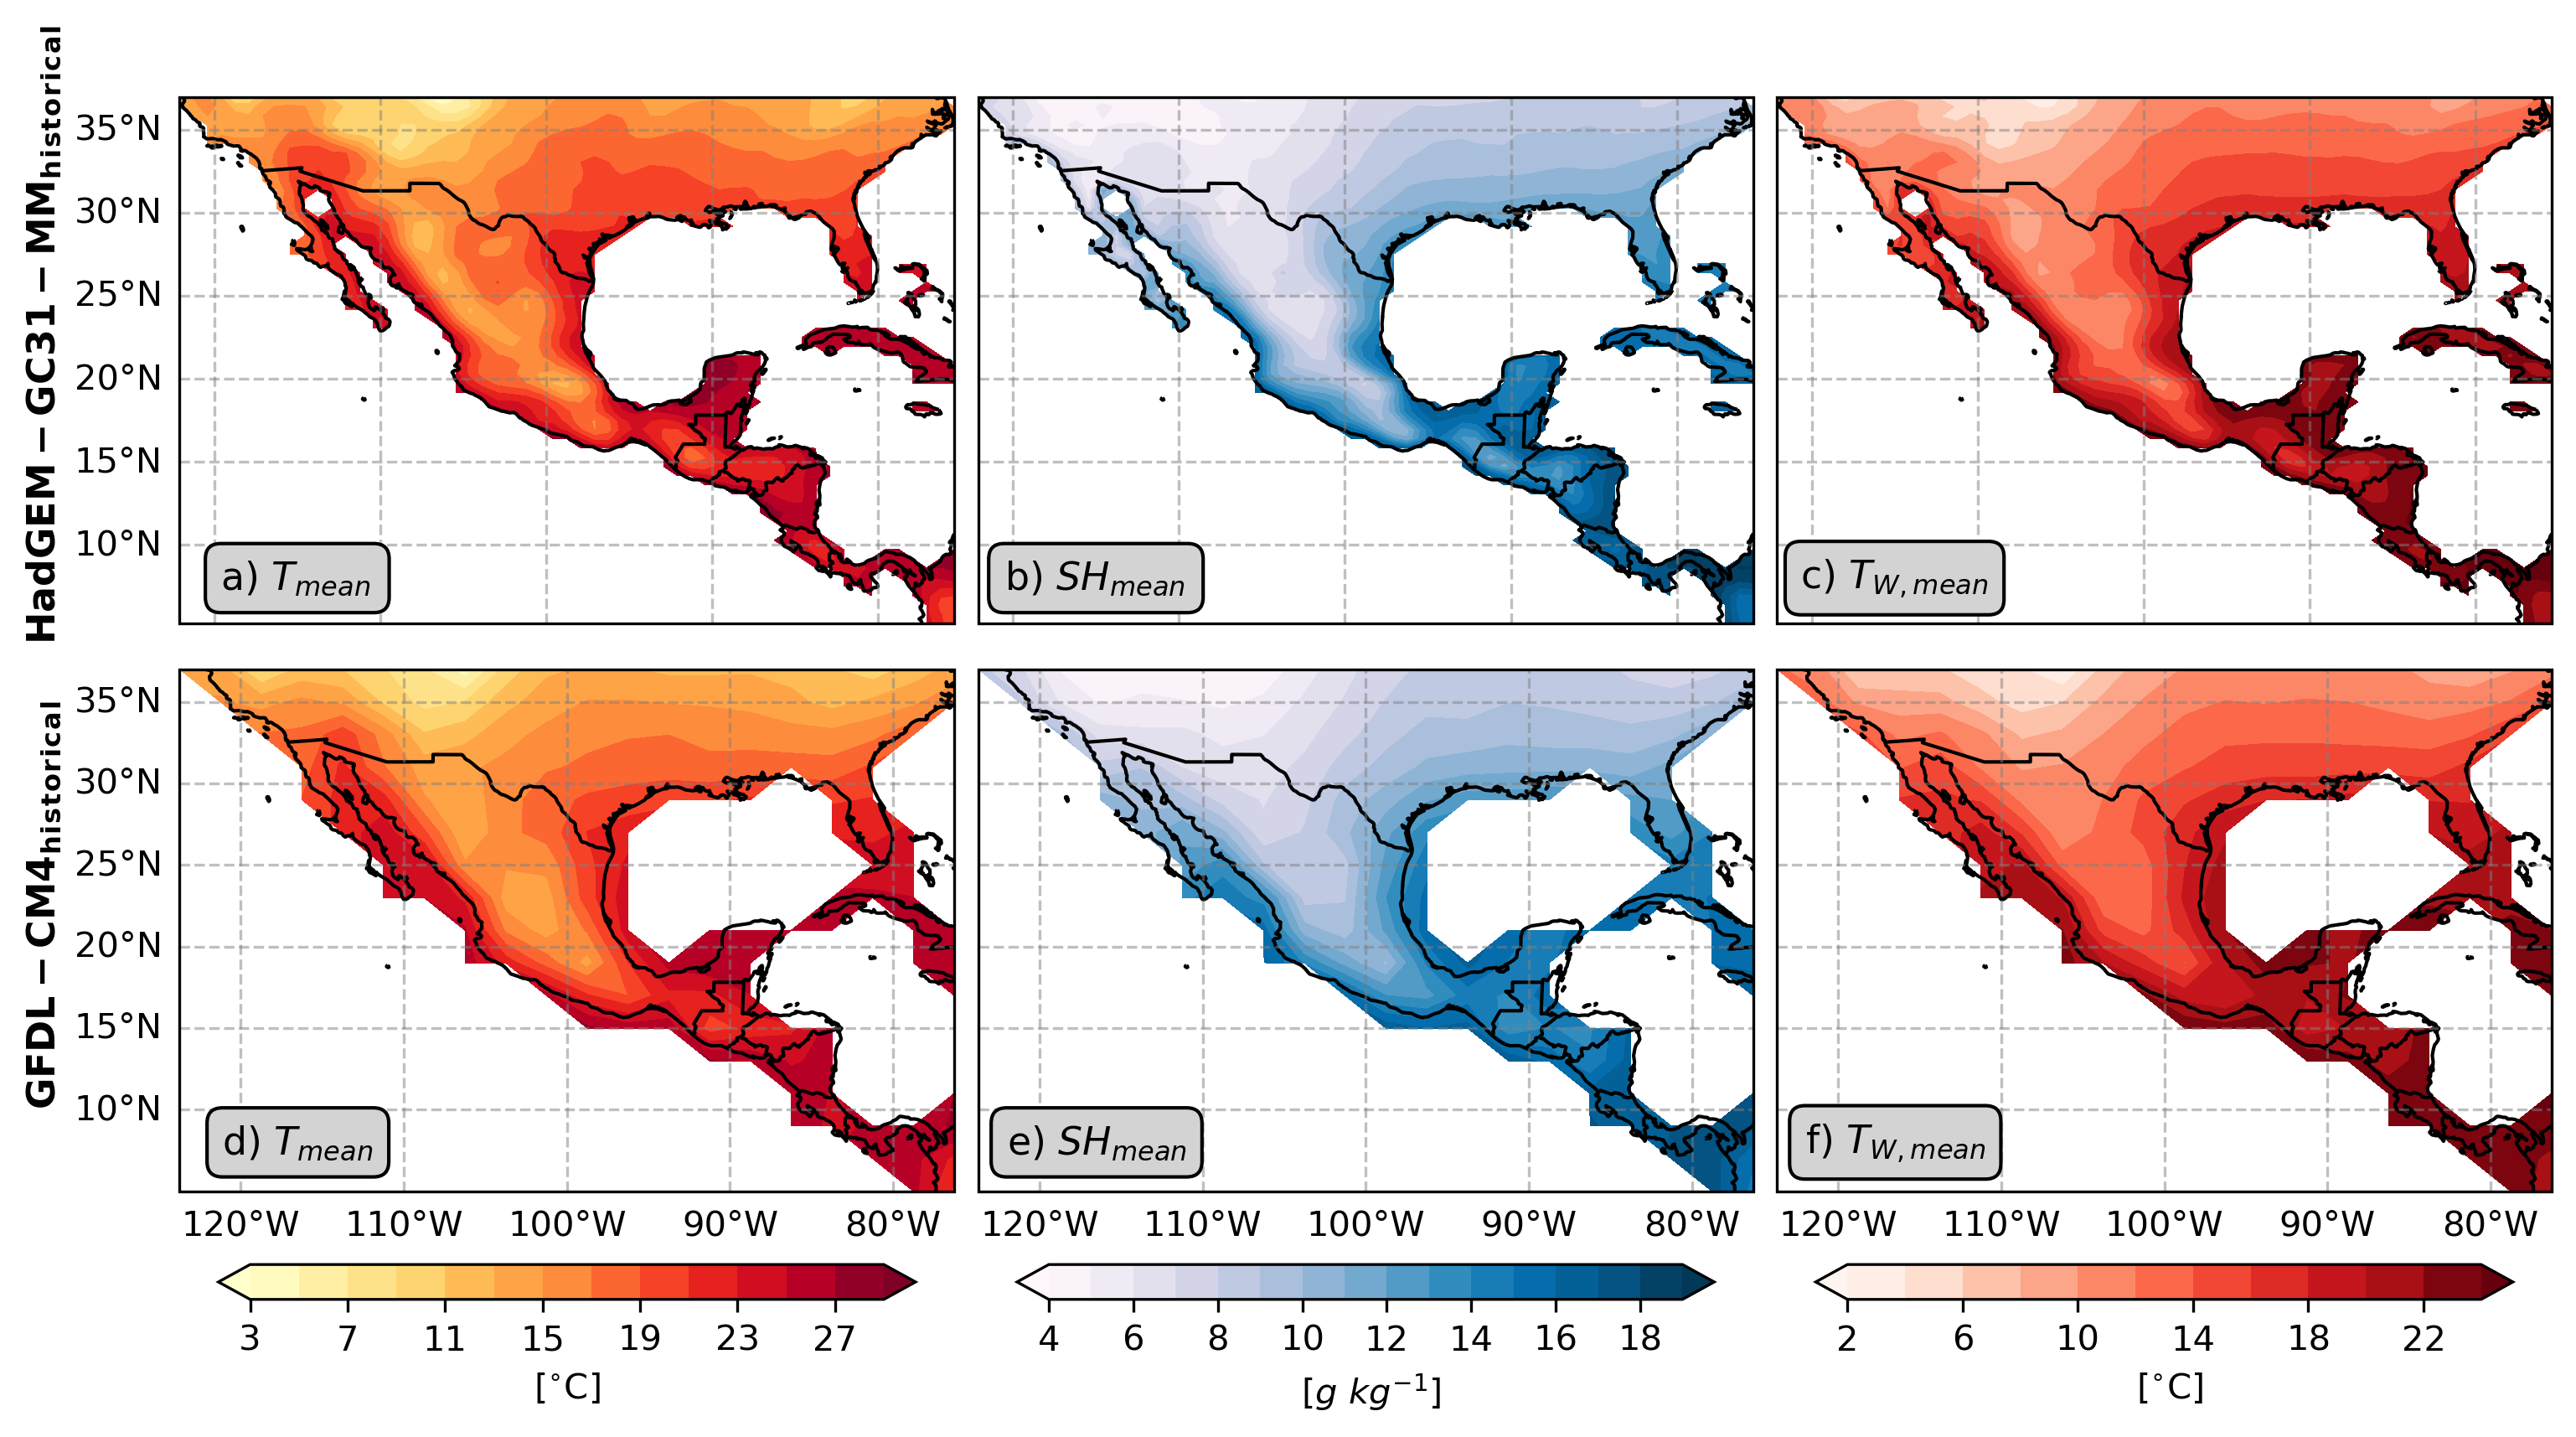

In [14]:
fig = plt.figure(figsize=(10, 7),dpi=300)

for idata,data in enumerate(datos):
    
    models=data
    if idata==0 or idata==3:
        levelss=np.arange(3,30,2)
        
    elif idata==1 or idata==4:
        levelss=np.arange((seHADL_q*1000).min(),(seHADL_q*1000).max(),1)
    else:
        levelss=np.arange(2,25,2)
    
    ax = fig.add_subplot(2, 3, 1+idata, projection=ccrs.PlateCarree())
    # agregamos lineas costeras
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    # grafico de contorno
    cs=ax.contourf(data.longitude,data.latitude,models,levels=levelss,cmap=colors[idata],extend='both',transform=ccrs.PlateCarree())
    
    gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--')
    ax.xlabels_top = False# It should turn off the upper x ticks
    gl.top_labels = gl.right_labels = False
    if idata!=0 and idata!=3:
        gl.left_labels = False
    if idata<3:
        gl.bottom_labels=False

    if idata>2:
        cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.2,pad=0.09,shrink=0.9)
        cbar.ax.set_xlabel(name[idata])
        
    if idata==0:
        ax.text(-0.15, 0.55, r'$\mathbf{HadGEM-GC31-MM}$$\mathbf{_h}$$\mathbf{_i}$$\mathbf{_s}$$\mathbf{_t}$$\mathbf{_o}$$\mathbf{_r}$$\mathbf{_i}$$\mathbf{_c}$$\mathbf{_a}$$\mathbf{_l}$',fontsize=11, va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
    if idata==3:
        ax.text(-0.15, 0.55, r'$\mathbf{GFDL-CM4}$$\mathbf{_h}$$\mathbf{_i}$$\mathbf{_s}$$\mathbf{_t}$$\mathbf{_o}$$\mathbf{_r}$$\mathbf{_i}$$\mathbf{_c}$$\mathbf{_a}$$\mathbf{_l}$',fontsize=11, va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)

    
    if idata<3:
        lim=-115
    else:
        lim=-116.5
    plt.text(lim, 8, inc[idata], fontsize=11, color="black", ha="center", va="center", bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round",pad=0.4))
    
plt.tight_layout(h_pad=-4,pad=0.2)
plt.subplots_adjust(top=0.85)

plt.savefig("clim_histo_models.svg",bbox_inches="tight",dpi=300)
plt.savefig("clim_histo_models.png",bbox_inches="tight",dpi=300)